# The Classification of Bird Species into their Taxonomical Families Based on Physical Measurements

Dani Zenarosa 84518760, Ty Semba 76640911, Daniel Waltz 21236716

**<ins>Introduction:</ins>**

Taxonomic classification is the grouping of species at different levels based on functional and genetic similarities. A crucial aspect of gene family classification is the identification of homologs in different species (Nestor et al., 2023). Homologs are similarities across the whole genome or identical genes across the genomes of different species which often indicates similarities in functionality between species. Though noticably similar genomes do not necessarily indicate identical gene expression, species with similar genomes often come from relatively recent common ancestors. This brings implications of species similarities. The observations of the differences between species can give insights to different envrionmental factors that gave rise to speciation, but even with substancial differences, species hailing from common ancestors will have physical similarities.

Birdwatching, and associated activities such as identifying birds, has been a common hobby for centuries. In just February of this year, the world record for most birds having been seen across the world, 10 000 birds, was broken. There will never be a guarantee that humans have identified all bird species, even as recently as 2022, a new species of bird was identified, the Cinnyris infrenatus. More often than not, difficulties in identifying new species of birds comes from the lack of empirical data or evidence of their existence. When non-expert enthusiasts come across rare or unfamiliar birds, they will often take pictures and try to identify the birds later on. From these pictures, obviously colour and general traits can be identified, but those are often not enough to properly identify birds, but specific dimensions of the bird sich as wingspan, beak size and more can be identified. Particularly in the case of new species identification, which can be difficult when images are the only evidence, it would certainly be easier, as well as beneficial, to identify the bird's taxonomic family. THus, our question is:

Based on an unknown bird's dimensions, what family does the given bird belong to?

We will be using the AVONET database, compiled by Tobias et al. (2022). It is compiled in an excel sheet. We will primarily be focusing on page 2 of the excel sheet "AVONET1_BirdLife". This dataset describes more than 90 000 individual birds rorm over 11 000 species. The individuals are grouped into species and each observation includes the order and family of each species of bird as well as the average beak length, width and depth, wingspan, tarsus length, kipps distance, tail length and mass among all recorded individuals of the specie.898*

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)
library(httr)

options(repr.plot.height = 6, repr.plot.width = 9)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
packageVersion("readxl")

url = "https://github.com/danizenarosa/dsci-100-grp43/raw/main/data/birds.xlsx"
GET(url, write_disk(tf <- tempfile(fileext = ".xlsx")))
birds_data <- read_excel(tf, 2, col_types = "text") |>
              mutate(Total.individuals = as.numeric(Total.individuals), across(Beak.Length_Culmen:Mass, as.numeric)) |>
              mutate(Beak.Length = Beak.Length_Culmen,
                    Nares = Beak.Length_Nares,
                    Family = Family1,
                    Secondary = Secondary1,
                    HandWing.Index = `Hand-Wing.Index`) |>
              select(Family, Beak.Length, Nares, Beak.Width:Kipps.Distance, Secondary, HandWing.Index, Tail.Length, Mass)


[1] ‘1.4.3’

Response [https://raw.githubusercontent.com/danizenarosa/dsci-100-grp43/main/data/birds.xlsx]
  Date: 2024-04-16 08:15
  Status: 200
  Content-Type: application/octet-stream
  Size: 21.5 MB
<ON DISK>  /tmp/RtmpZjoiy4/file27f9177a871e.xlsxNULL

In [3]:
birds_count <- birds_data |>
    group_by(Family) |>
    summarize(count = n(), across(Beak.Length:Mass, mean)) |> 
    slice_max(count, n = 10)  

birds_top_10 <- birds_count |>
                pull(Family)

total_birds <- birds_data |>
    filter(Family %in% birds_top_10) |>
    summarize(count = n()) |>
    pull(count)
total_birds
birds_count

[1] 3364

Family,count,Beak.Length,Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary,HandWing.Index,Tail.Length,Mass
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tyrannidae,449,15.56258,9.114031,5.036748,4.019154,18.646771,71.56526,14.118040,57.40601,18.39532,61.27528,17.638731
Thraupidae,408,14.98162,9.151471,5.147059,6.517402,20.008088,73.55637,13.916176,59.51912,18.84118,59.21642,23.264240
Psittacidae,380,25.13895,20.775263,12.623421,21.402632,16.787895,152.61053,60.650789,91.83684,40.39026,114.55868,166.488474
Trochilidae,366,23.85738,18.869672,2.165574,2.053279,5.131148,57.00355,35.921038,20.89918,63.43224,40.48607,5.136995
Columbidae,353,22.42493,11.301133,4.667422,5.226912,27.532295,169.17167,53.297167,115.84533,31.12011,112.45552,257.899122
Muscicapidae,335,16.52776,9.501493,4.050448,4.124478,23.618209,81.11552,15.688657,65.33761,19.14179,64.11015,24.417015
Furnariidae,329,22.19301,15.050760,3.935866,4.908511,22.293313,80.44681,13.644681,66.80365,16.38172,79.69544,30.622097
Picidae,253,28.17747,21.218182,7.379842,7.290514,21.410277,118.79565,26.264032,92.39012,21.31581,75.43478,87.136877
Accipitridae,249,39.08112,23.926908,12.744177,18.358233,72.042169,363.82771,130.638554,233.48554,34.90120,216.17108,1243.621847


**<ins>Figure 1:</ins>** First Look at Data

With an initial reading of the important variable for our prediction, we can see that there is a large enough disparity in measurements for the 10 largest species. However, a quick look shows that the families Tyrannidae (Tyrant Flycatchers) and Thraupidae (Tanagers) as well as a few others have similar measurements. A tally of the species listed was done to comprehend the size of the data set and the scope with which the analysis should be done.

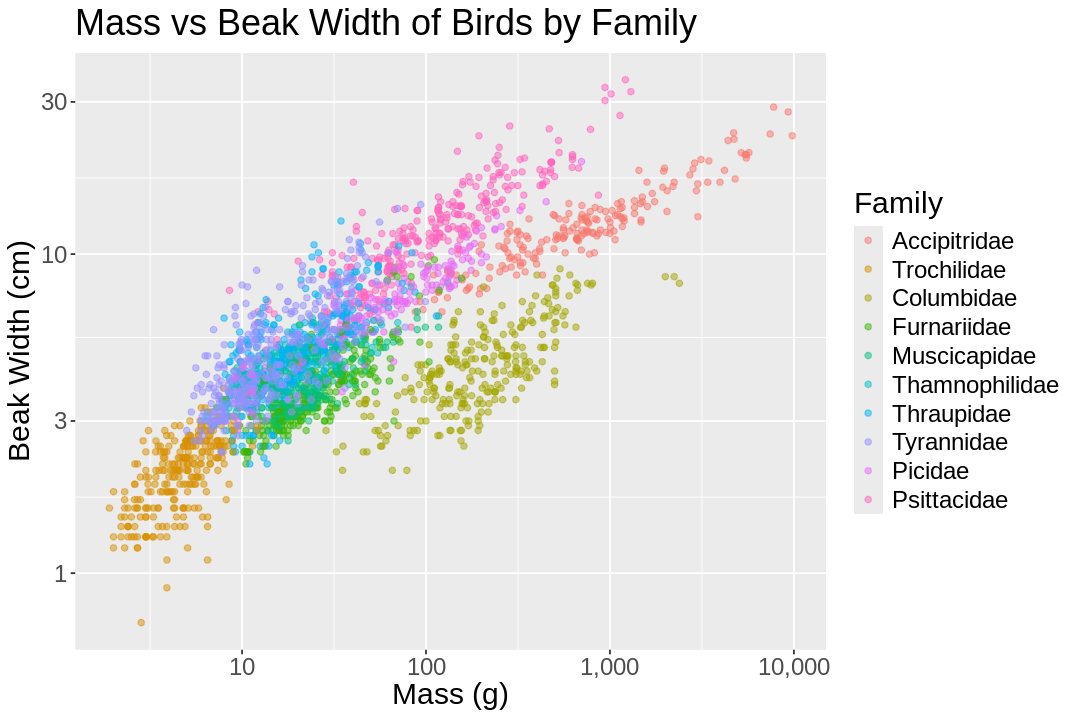

In [4]:
set.seed(1)


birds_data_pruned <- filter(birds_data, Family %in% birds_top_10) |>
    mutate(Family = as_factor(Family))

split_birds <- initial_split(birds_data_pruned, prop = 0.75, strata = Family)
training_birds <- training(split_birds)
test_birds <- testing(split_birds)

bird_beak_mass_plot <- training_birds |>
    ggplot(aes(x = Mass, y = Beak.Width, color = Family)) +
    geom_point(alpha = .5) +
    labs(x = "Mass (g)", y = "Beak Width (cm)", color= "Family", title = "Mass vs Beak Width of Birds by Family") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) +
    theme(text = element_text(size = 18))

bird_beak_mass_plot

**<ins>Figure 2:</ins>** Mass vs Beak Width Plot

With the birds selected and a general view of the project's path, we can model a 2d example of the data that our prediction would look at. In this graph, we have selected mass and beak width to compare, while coloring the different families to show the spread of groups. With this initial evidence of distinctive features between families, we move on to using all available variables to perform the classification of species into families.

In [5]:
birds_vfold <- vfold_cv(training_birds, v = 5, strata = Family)

knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

birds_recipe <- recipe(Family ~ ., data = training_birds) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

birds_results <- workflow() |>
    add_recipe(birds_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = birds_vfold, grid = k_vals) |>
    collect_metrics()


bird_accuracies <- birds_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(bird_accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_y_continuous(limits = c(0.4, 1.0))

n_neighbor <- bird_accuracies |>
    arrange(mean = desc(mean)) |>
    slice(1) |>
    pull(neighbors)

n_neighbor

[1] 1

In [6]:
birds_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = n_neighbor) |>
    set_engine("kknn") |>
    set_mode("classification")

birds_fit <- workflow() |>
    add_recipe(birds_recipe) |>
    add_model(birds_spec) |>
    fit(data = training_birds)

birds_predictions <-   predict(birds_fit, test_birds) |>
  bind_cols(test_birds)

birds_metrics <- metrics(birds_predictions, truth = Family, estimate = .pred_class) |>
    filter(.metric == "accuracy")

birds_conf_mat <- conf_mat(birds_predictions, truth = Family, estimate = .pred_class)

birds_metrics
birds_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9192399


                Truth
Prediction       Accipitridae Trochilidae Columbidae Furnariidae Muscicapidae
  Accipitridae             65           0          1           0            0
  Trochilidae               0          86          0           0            0
  Columbidae                0           0         83           0            0
  Furnariidae               0           1          0          75            2
  Muscicapidae              0           0          1           0           63
  Thamnophilidae            0           0          0           2            0
  Thraupidae                0           1          0           3            1
  Tyrannidae                0           0          0           3           15
  Picidae                   0           0          0           2            0
  Psittacidae               0           0          0           0            0
                Truth
Prediction       Thamnophilidae Thraupidae Tyrannidae Picidae Psittacidae
  Accipitridae          

**<ins>Figure 3:</ins>** Resulting Predictions Compared to True Families

The best number of neighbors to use was determined to be 1 by 5-fold cross-validation. Using 1 neighbor, the accuracy of our model was calculated to be 92% from our test data. The generated confusion matrix reveals that birds in the families Accipitridae and Psittacidae were perfectly predicted, while the families mentioned before as having similar mean measurements have many more failed predictions. The worst offender of these is Tyrannidae and Muscicapidae, where 15 errors in prediction are made both ways.

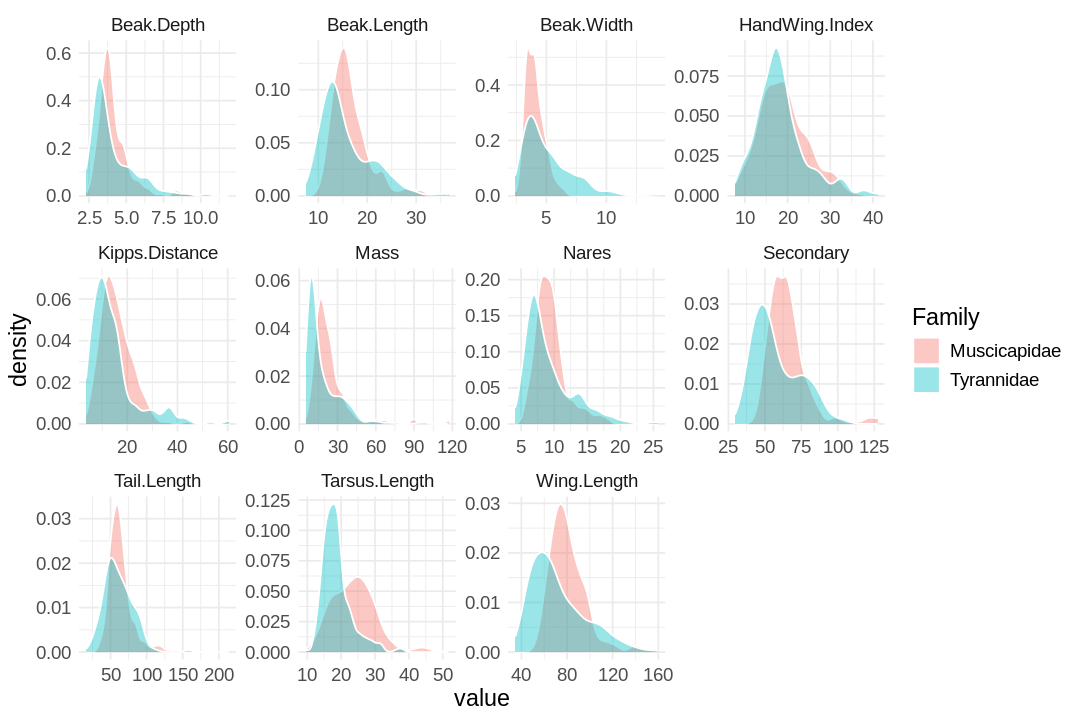

In [11]:
bad_families <- c('Tyrannidae','Muscicapidae')
confused_birds <- filter(training_birds, Family %in% bad_families)

confused_birds |>
    pivot_longer(cols = -Family, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = Family)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 14))

**<ins>Figure 4:</ins>** Density Plot of Similar Families

This large error between only 2 of the 10 families was explored by mapping the "density" of each measurement in an individual family, and comparing this to the other. Using this, it can be seen that there is overlap between every measurement, to the point that many measurements are nearly identical between the two families.

In [8]:
# set.seed(1)

# birds_small <- rep_sample_n(training_birds, 300)

# accuracies <- tibble(size = integer(),
#                      model_string = character(),
#                      accuracy = numeric())


# # create a 5-fold cross-validation object
# birds_vfold_small <- vfold_cv(birds_small, v = 5, strata = Family)

# # store the total number of predictors
# names <- colnames(training_birds |> select(-Family))
# n_total <- length(names)

# # stores selected predictors
# selected <- c()

In [9]:
# set.seed(1)
# # for every size from 1 to the total number of predictors
# for (i in 1:n_total) {
#     # for every predictor still not added yet
#     accs <- list()
#     models <- list()
#     for (j in 1:length(names)) {
#         # create a model string for this combination of predictors
#         preds_new <- c(selected, names[[j]])
#         model_string <- paste("Family", "~", paste(preds_new, collapse="+"))

#         # create a recipe from the model string
#         birds_recipe_small <- recipe(as.formula(model_string),
#                                 data = birds_small) |>
#                           step_scale(all_predictors()) |>
#                           step_center(all_predictors())

#         # tune the K-NN classifier with these predictors,
#         # and collect the accuracy for the best K
#         acc <- workflow() |>
#           add_recipe(birds_recipe_small) |>
#           add_model(knn_tune) |>
#           tune_grid(resamples = birds_vfold_small, grid = 10) |>
#           collect_metrics() |>
#           filter(.metric == "accuracy") |>
#           summarize(mx = max(mean))
#         acc <- acc$mx |> unlist()

#         # add this result to the dataframe
#         accs[[j]] <- acc
#         models[[j]] <- model_string
#     }
#     jstar <- which.max(unlist(accs))
#     accuracies <- accuracies |>
#       add_row(size = i,
#               model_string = models[[jstar]],
#               accuracy = accs[[jstar]])
#     selected <- c(selected, names[[jstar]])
#     names <- names[-jstar]
# }
# accuracies

As an aside, an analysis of the predictor variables was made using code from "Data Science: A First Introduction". This code took too long to render within the frames of the project, and instead the results were loosely recorded below while the code was commented out to remain visible. Little inference could be gained due to the small sample size used, and there was only a predicted change of .4% if Kipps Distance was left out. Due to these limited results, none of the below results were used to influence our final project.

In [10]:
#size	model_string            	accuracy
#<int>	<chr>	<dbl>
#1	Family ~ Secondary          	0.4301783
#2	Family ~ ...+Beak.Depth     	0.6704602
#3	Family ~ ...+Nares          	0.7705292
#4	Family ~ ...+Beak.Width     	0.8236670
#5	Family ~ ...+Wing.Length    	0.8437331
#6	Family ~ ...+Beak.Length    	0.8438539
#7	Family ~ ...+Mass            	0.8505206
#8	Family ~ ...+Tarsus.Length   	0.8471872
#9	Family ~ ...+Tail.Length    	0.8340725
#10	Family ~ ...+HandWing.Index 	0.8598965
#11	Family ~ ...+Kipps.Distance 	0.8561576


**<ins>Figure 5:</ins>** Accuracies of Models Including Different Variables

**<ins>Methods:</ins>**

In this investigation, we used the columns from beak length to mass to classify the family that the individual belongs to (Fig 1). To do this, first we performed 5-fold cross-validation for our classification model to evaluate the performance of the predictive model and found it to be highest performing when classifying new observation by the single nearest individual in the dataset. Using one neighbor, the results were expressed with a confusion matrix to highlight areas in which it excelled and areas in which there were errors (Fig 3). A selection of these errors was further explored to determine the cause. This was accomplished using a density plot of all measurements for the two families with the most inaccurate predictions between them (Fig 4).

**<ins>Discussion:</ins>**

Through this classification investigation, we were able to classify individual bird species observations into their respective families with an accuracy of approximately 92%. This study used 11 different measurement variables of birds to classify species into one of the top 10 most populous bird families. Within the top 10 largest families, the model sometimes struggled to identify which family was being presented between two families, the Tyrannidae and the Muscicapidae families. Figure 4 suggests that a focus on the length of the wing, the length of the tarsus and the distance from the bend of the wing to the first secondary feather could be focused on as distinguishers between these two highly similar bird species.

The limitation we set to the 10 most populous taxonomic families made for a more realistic and balanced classification model, but may have caused us to overlook specific variables which may be more or less important. Using only the top 10 families, we saw minimal improvement in the addition or removal of most variables to our model, as is shown in Figure 5, but Figure 4 suggests that, as we include smaller and more specified families, models including or excluding specific variables may become more accurate.

We had expected to find a strong correlation between bird dimensions and their family, even across different species. From this we expected to be able to predict the family of unknown birds based only on measurements. Our predictions were broadly correct. With an accuracy around 92%, the model showed great promise in correctly identifying a single species observation's family. 

If non-experts come across new bird species, it could be vital to be able to identify the bird's close biological relatives for scientists to identify important biological traits without being present to study them. As mentioned above, it is likely evidence might only be able to exist in the form of an image and so more specific behavioural data may not be able to be taken. 

Since it has been shown that birds in the top 10 most populous taxonomic families can, with a high accuracy, be categorized into the correct families using only the average measurements of the dimensions of a handfull of birds in a given species, future research might explore how to improve the accuracy of similar predictive models as we explore less populous families. For example, a future investigation might ask, how does the inclusion of different ratios of dimentions improve the accuracy of predictive models among the top 20 most populous families of birds. Research along this line of questioning might also call into question the biological and evolutionary implications of different biological families being more or less similar to one another.   

**<ins>References</ins>**


*Tobias, J. A., Sheard, C., Pigot, A. L., Devenish, A. J., Yang, J., Sayol, F., Neate‐Clegg, M. H., Alioravainen, N., Weeks, T. L., Barber, R. A., Walkden, P. A., MacGregor, H. E., Jones, S. E., Vincent, C., Phillips, A. G., Marples, N. M., Montaño‐Centellas, F. A., Leandro‐Silva, V., Claramunt, S., … Schleuning, M. (2022). Avonet: Morphological, ecological and geographical data for all birds. Ecology Letters, 25(3), 571–707.
https://doi.org/10.1111/ele.13898*

*Nestor, B. J., Bayer, P. E., Fernandez, C. G., Edwards, D., & Finnegan, P. M. (2023). Approaches to increase the validity of gene family identification using manual homology search tools. Genetica, 151(6), 325–338. https://doi.org/10.1007/s10709-023-00196-8*

